empty 377 377
oil 400 400
vinegar 260 260
water 400 400


GaussianNB()

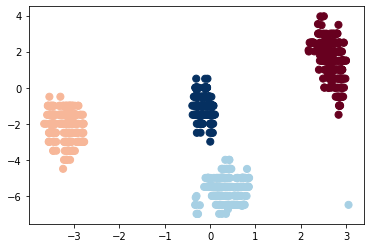

In [53]:
import glob, os
## 导入数据
matls = ['empty', 'oil', 'vinegar', 'water']
dfs = []
for matl in matls:
    df_f = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\outdoor\\front-tail\\outdoor_all_f_%s_aligned.csv' % matl)
    df_t = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\outdoor\\front-tail\\outdoor_all_t_%s_aligned.csv' % matl)
    dfs.append({'front': df_f, 'tail': df_t})
    print(matl, len(df_f), len(df_t))
y = []
d_p = []
d_r = []
for i in range(0, 4):
    diff_phase = dfs[i]['front']['PHASE'].values - dfs[i]['tail']['PHASE'].values
    diff_rssi = dfs[i]['front']['RSSI'].values - dfs[i]['tail']['RSSI'].values
    d_p.extend(diff_phase)
    d_r.extend(diff_rssi)
    y.extend(np.repeat([i], len(diff_phase)))
X = np.column_stack((d_p, d_r))

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)